<a href="https://colab.research.google.com/github/SAFIN-157/Model-Development/blob/main/Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries and Dataset**

In [56]:
# import piplite
# await piplite.install('seaborn')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

!pip install seaborn

filepath="/content/clean_df.csv"
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,8.703704,13495,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,8.703704,16500,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,12.368421,9.038462,16500,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,9.791667,7.833333,13950,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,13.055556,10.681818,17450,Low,False,True,True,False


**Linear Regression**

In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['highway-L/100km']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:7]

array([15485.5273768 , 15485.5273768 , 16643.34931394, 12475.19033123,
       22327.20246809, 17893.79701048, 17893.79701048])

In [58]:
lm.intercept_

np.float64(-14617.843058102371)

In [59]:
lm.coef_

array([3458.68511368])

Another

In [60]:
lm1 = LinearRegression()
lm1.fit(df[['engine-size']], df[['price']])
Yhat=lm1.predict(df[['engine-size']])
Yhat[0:6]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775],
       [14729.62322775]])

In [61]:
lm1.intercept_

array([-7963.33890628])

In [62]:
lm1.coef_

array([[166.86001569]])

**Multiple Linear Regression**

In [63]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
lm.fit(Z, df['price'])

LinearRegression()

In [64]:
lm.intercept_

np.float64(-14385.634549502029)

In [65]:
lm.coef_

array([ 36.6377371 ,   3.50038215,  85.37370861, 500.51979798])

Another

In [66]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-L/100km']],df['price'])

LinearRegression()

In [67]:
lm2.coef_

array([-2.86467994e+00,  3.46770737e+03])

In [68]:
lm2.intercept_

np.float64(-14340.935765702805)

**Model Evaluation Using Visualization**

In [69]:
import seaborn as sns
%matplotlib inline

**Regression Plot**

(0.0, 47711.27656503783)

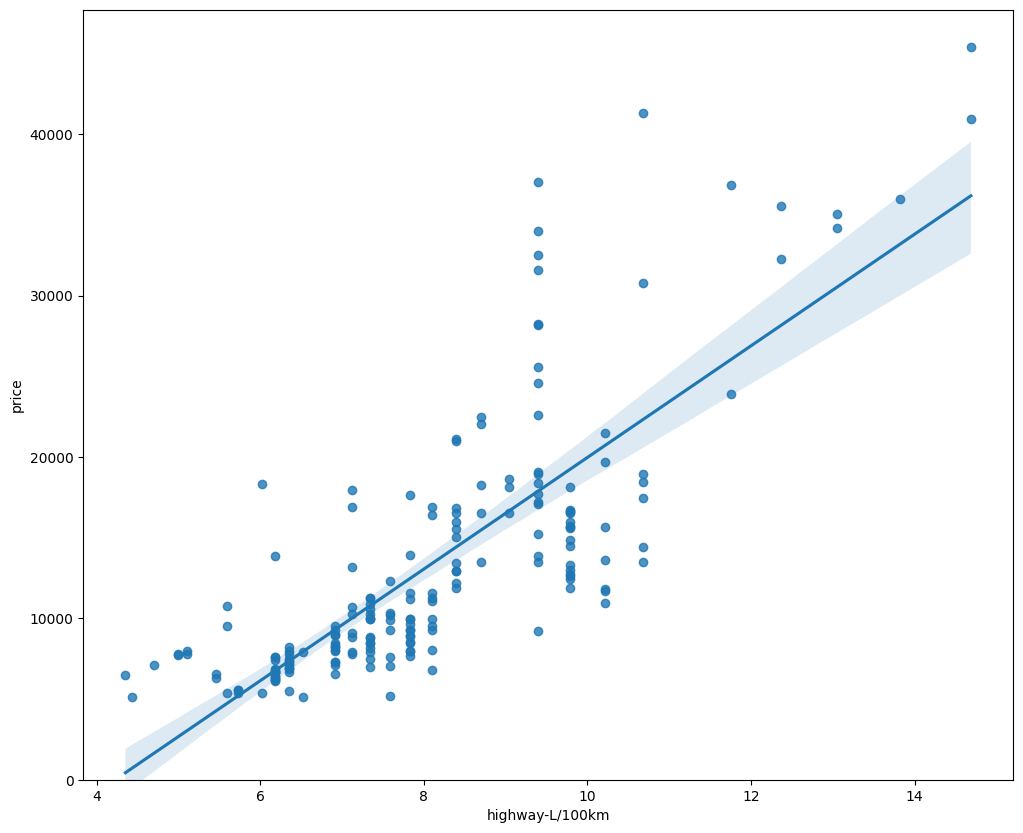

In [70]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

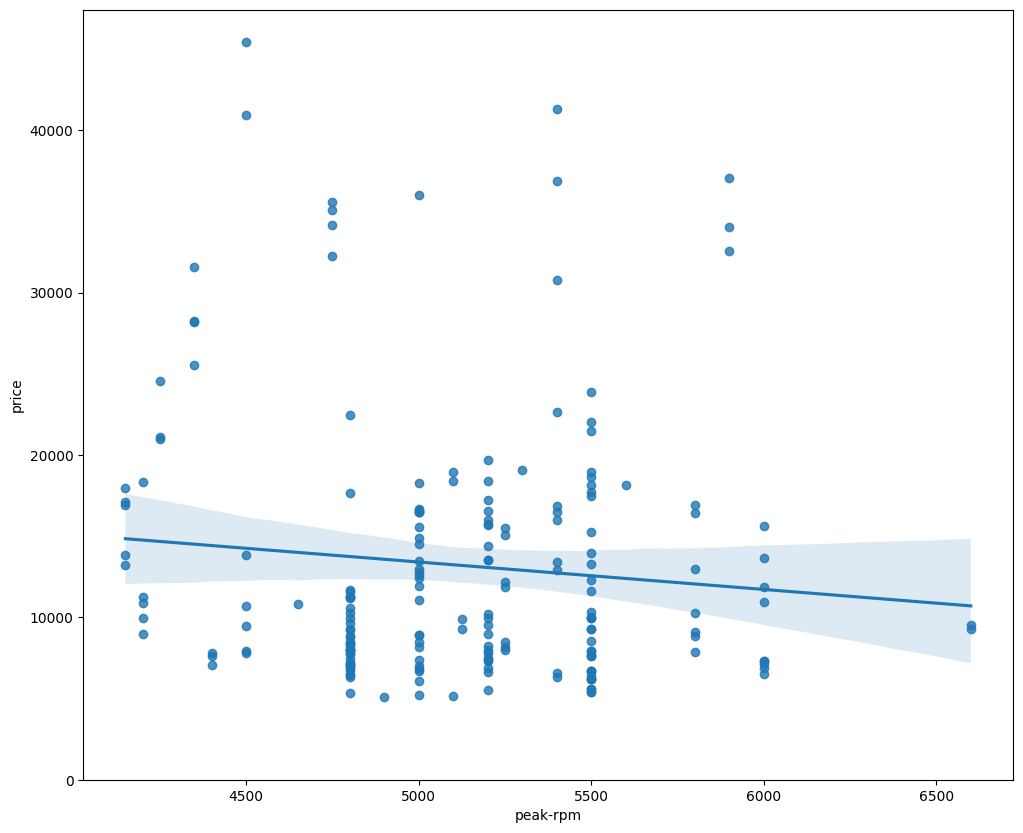

In [71]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Verify the result

In [72]:
df[["peak-rpm","highway-L/100km","price"]].corr()

,peak-rpm,highway-L/100km,price
peak-rpm,1.000000,0.017694,-0.101616
highway-L/100km,0.017694,1.000000,0.801118
price,-0.101616,0.801118,1.000000


Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

**Residual Plot**

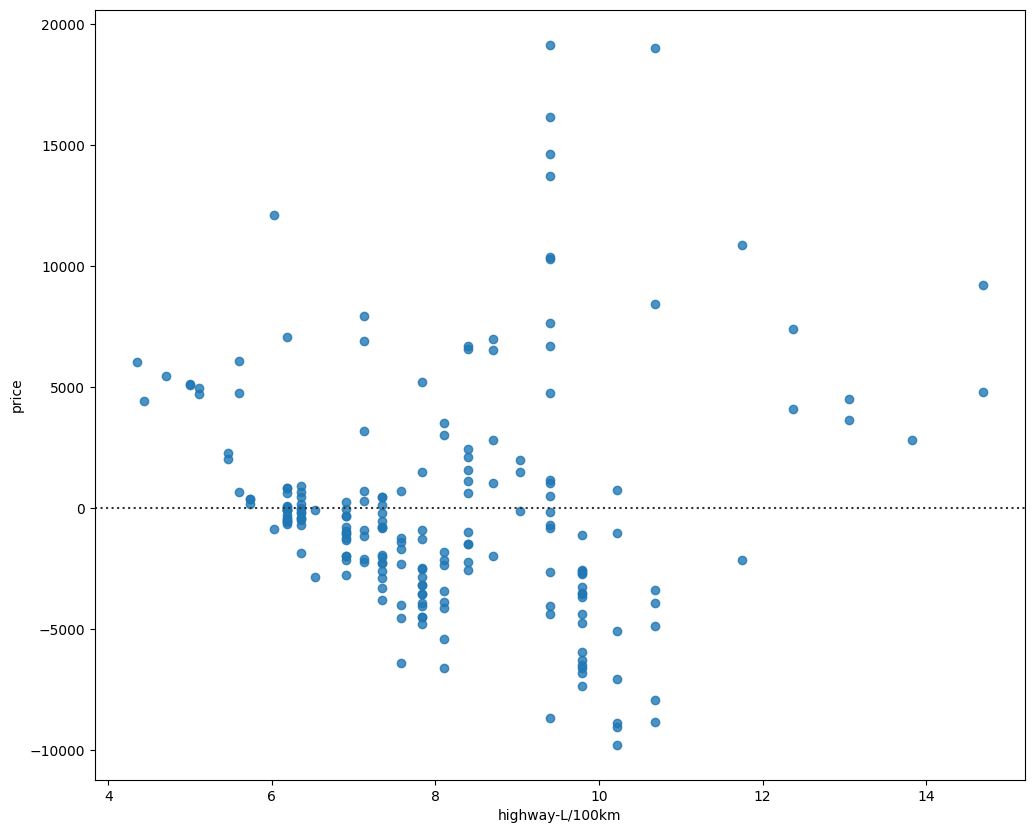

In [73]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-L/100km'], y=df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

How do we visualize a model for Multiple Linear Regression? Lets see...

**Distribution Plot**

/tmp/ipython-input-2944071929.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/tmp/ipython-input-2944071929.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values

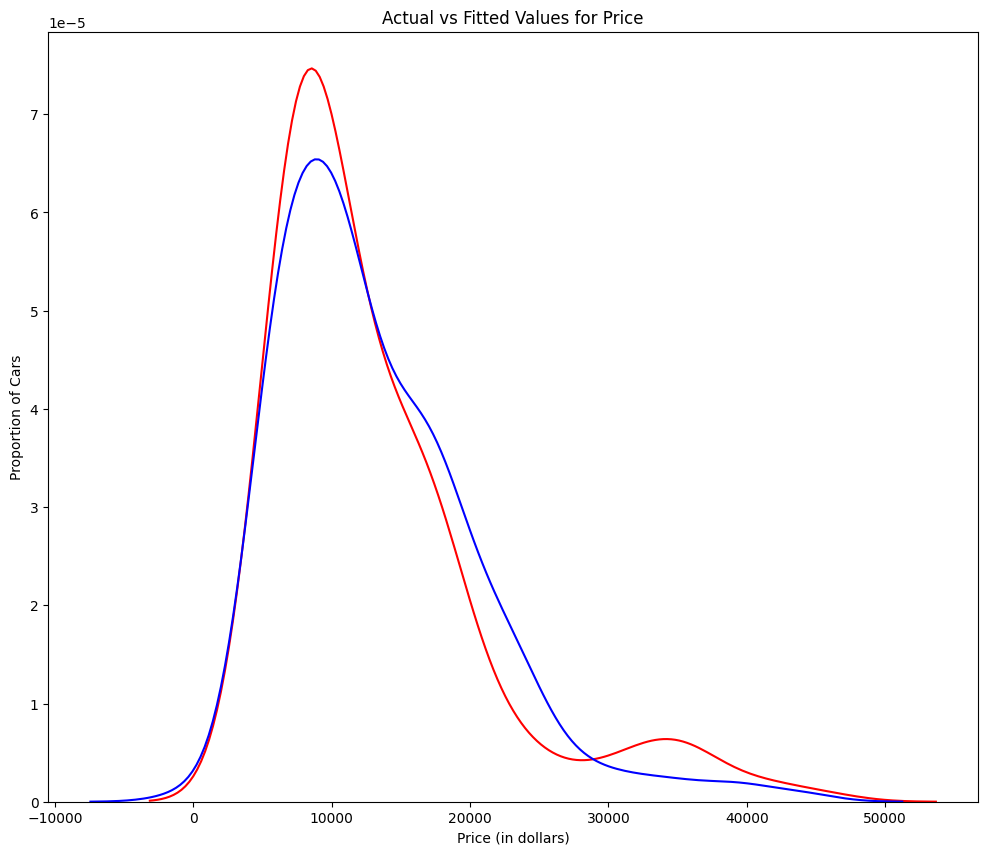

In [74]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

**Polynomial Regression and Pipelines**

In [75]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(4, 15, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [76]:
x = df['highway-L/100km']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


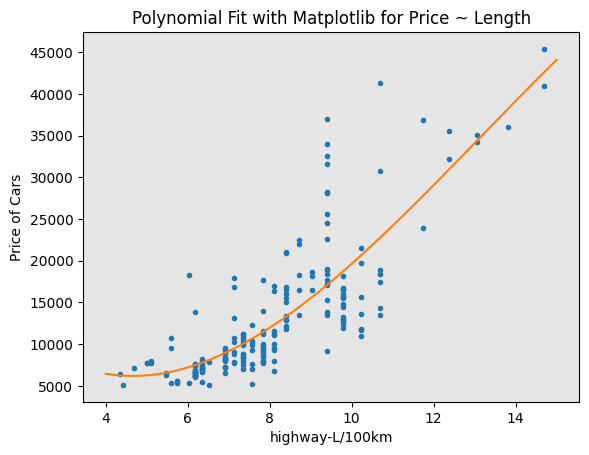

In [77]:
PlotPolly(p, x, y, 'highway-L/100km')

In [78]:
np.polyfit(x, y, 3)

array([  -23.40461037,   923.57035261, -7083.14336629, 21515.16041257])

          11          10         9         8             7
0.003545 x  - 0.4733 x  + 26.87 x - 870.3 x + 1.803e+04 x
              6             5             4            3             2
 - 2.523e+05 x + 2.441e+06 x - 1.637e+07 x + 7.47e+07 x - 2.213e+08 x + 3.832e+08 x - 2.943e+08


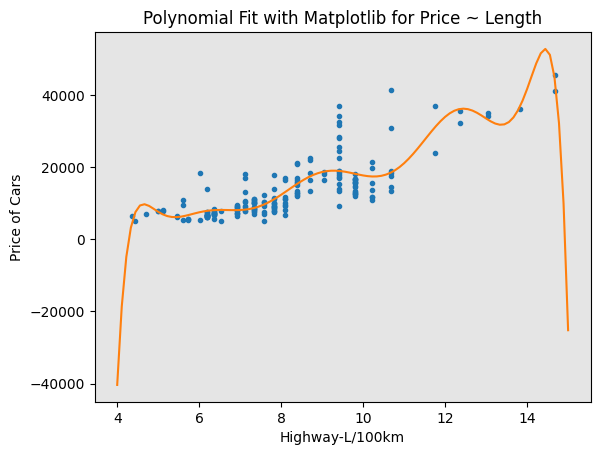

In [79]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway-L/100km')

**Polynomial Features**

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
pr=PolynomialFeatures(degree=2)
pr
Z_pr=pr.fit_transform(Z)

In [82]:
Z.shape

(201, 4)

In [83]:
Z_pr.shape

(201, 15)

**Pipeline**

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [85]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [86]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [87]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12395.5870705 , 12395.5870705 , 18422.45365268,  9979.77570866])

In [88]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([14055.08612672, 14055.08612672, 18638.88842633, 10758.28037599,
       16670.07025816, 14735.68505454, 15915.31383915, 16300.35587566,
       18610.89141475, 10974.48897168])

**Measures for In-Sample Evaluation**

**Model 1: Simple Linear Regression**

In [102]:
#highway_L/100km_fit
lm.fit(X, Y)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6417894514174418


In [90]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [15485.5273768  15485.5273768  16643.34931394 12475.19033123]


In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  22510543.771331444


**Model 2: Multiple Linear Regression**

In [93]:
# fit the model
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8118115615349618


In [94]:
Y_predict_multifit = lm.predict(Z)

In [95]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11826072.956501495


**Model 3: Polynomial Fit**

In [96]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.67535816619289


In [97]:
mean_squared_error(df['price'], p(x))

20401030.173001688

**Prediction and Decision Making**

In [98]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [99]:
lm.fit(X, Y)
lm

LinearRegression()

In [105]:
yhat=lm.predict(new_input)
yhat[0:10]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-11159.15794442,  -7700.47283074,  -4241.78771706,   -783.10260339,
         2675.58251029,   6134.26762397,   9592.95273765,  13051.63785133,
        16510.32296501,  19969.00807869])

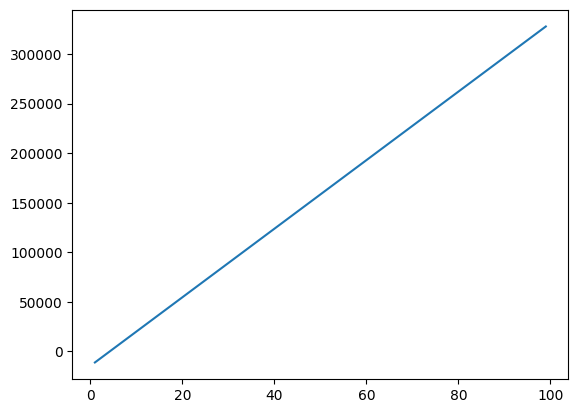

In [106]:
plt.plot(new_input, yhat)
plt.show()

# **Decision Making:** Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
- When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
- When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.

**Simple Linear Regression:** Using highway-L/100km as a Predictor Variable of Price.

- R-squared: 0.6417894514174418
- MSE: 22510543.771331444

**Multiple Linear Regression:** Using Horsepower, Curb-weight, Engine-size, and highway-L/100km as Predictor Variables of Price.

- R-squared: 0.8118115615349618
- MSE: 11826072.956501495

**Polynomial Fit:** Using highway-L/100km as a Predictor Variable of Price.

- R-squared: 0.67535816619289
- MSE: 20401030.173001688

# **Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)**

- Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

- In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

- MSE: The MSE of SLR is 22510543.771331444 while MLR has an MSE of 11826072.956501495. The MSE of MLR is much smaller.

- R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (0.6417894514174418) is small compared to the R-squared for the MLR (0.8118115615349618).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

# **Simple Linear Model (SLR) vs. Polynomial Fit**

- MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
- R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-L/100km" as a predictor variable.

# **Multiple Linear Regression (MLR) vs. Polynomial Fit**
- MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

# **Conclusion**

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.